In [28]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [29]:
with open("../Data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [30]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
191995,187,1314,BUG,SKELETON,7,15,999
191996,1438,1433,TAXI,TAPE,8,15,999
191997,1537,1489,UNDERWEAR,TOWEL,9,15,999
191998,386,283,COUCH,CHAUFFEUR,10,15,999


In [31]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
127995,947,NEUTRON,402,11,0,15,999
127996,467,DINER,1441,2,1,15,999
127997,1444,TEENAGER,1014,4,0,15,999
127998,1489,TOWEL,1537,9,1,15,999


### Run CMR-IA

In [32]:
s_mat = np.load('../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [33]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.1,
    beta_cue = 0.5,
    beta_distract = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  
    gamma_cf = 0.6,  # cf - fc Higher, ILI +1 Higher
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.5,
    phi_d = 0.5,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.1,
 'beta_cue': 0.5,
 'beta_rec_post': 0.1,
 'beta_distract': 0.1,
 'phi_s': 0.5,
 'phi_d': 0.5,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [34]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 787.4595370292664


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,823.0,1470.0,0.852134
1,0,0,1347,1051.0,1690.0,0.795432
2,0,0,413,524.0,1910.0,0.845137
3,0,0,812,1323.0,1150.0,0.798682
4,0,0,110,824.0,2560.0,0.584954
...,...,...,...,...,...,...
127995,15,999,947,-1.0,-1.0,-1.000000
127996,15,999,467,1441.0,2150.0,0.715916
127997,15,999,1444,-1.0,-1.0,-1.000000
127998,15,999,1489,-1.0,-1.0,-1.000000


In [35]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,823.0,1470.0,0.852134,CLIPPERS,823,9,1,True
1,0,0,1347,1051.0,1690.0,0.795432,SPARROW,1051,8,1,True
2,0,0,413,524.0,1910.0,0.845137,CROSS,524,7,0,True
3,0,0,812,1323.0,1150.0,0.798682,LEOPARD,1323,5,0,True
4,0,0,110,824.0,2560.0,0.584954,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,-1.0,-1.0,-1.000000,NEUTRON,402,11,0,False
127996,15,999,467,1441.0,2150.0,0.715916,DINER,1441,2,1,True
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False


In [36]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,823.0,1470.0,0.852134,CLIPPERS,823,9,1,True,0.0,9.0
1,0,0,1347,1051.0,1690.0,0.795432,SPARROW,1051,8,1,True,0.0,8.0
2,0,0,413,524.0,1910.0,0.845137,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,1323.0,1150.0,0.798682,LEOPARD,1323,5,0,True,0.0,5.0
4,0,0,110,824.0,2560.0,0.584954,BED,1083,0,0,False,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,-1.0,-1.0,-1.000000,NEUTRON,402,11,0,False,NaN,NaN
127996,15,999,467,1441.0,2150.0,0.715916,DINER,1441,2,1,True,15.0,2.0
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False,NaN,NaN


In [37]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,823.0,1470.0,0.852134,CLIPPERS,823,9,1,True,0.0,9.0,0.0,0.0,Correct
1,0,0,1347,1051.0,1690.0,0.795432,SPARROW,1051,8,1,True,0.0,8.0,0.0,0.0,Correct
2,0,0,413,524.0,1910.0,0.845137,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,1323.0,1150.0,0.798682,LEOPARD,1323,5,0,True,0.0,5.0,0.0,0.0,Correct
4,0,0,110,824.0,2560.0,0.584954,BED,1083,0,0,False,0.0,11.0,0.0,11.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,-1.0,-1.0,-1.000000,NEUTRON,402,11,0,False,NaN,NaN,NaN,NaN,NoResp
127996,15,999,467,1441.0,2150.0,0.715916,DINER,1441,2,1,True,15.0,2.0,0.0,0.0,Correct
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False,NaN,NaN,NaN,NaN,NoResp


In [38]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,1510.0,0.803293,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,232.0,1110.0,0.867792,UNIVERSE,232,9,0,True,1.0,9.0,0.0,0.0,Correct
10,1,0,528,1590.0,1550.0,0.845858,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,3770.0,0.818551,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,999.0,3440.0,0.632181,LOOP,396,5,1,False,1.0,6.0,0.0,1.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,-1.0,-1.0,-1.000000,NEUTRON,402,11,0,False,NaN,NaN,NaN,NaN,NoResp
127996,15,999,467,1441.0,2150.0,0.715916,DINER,1441,2,1,True,15.0,2.0,0.0,0.0,Correct
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,-1.0,-1.0,-1.000000,TOWEL,1537,9,1,False,NaN,NaN,NaN,NaN,NoResp


In [39]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,1510.0,0.803293,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,232.0,1110.0,0.867792,UNIVERSE,232,9,0,True,1.0,9.0,0.0,0.0,Correct
10,1,0,528,1590.0,1550.0,0.845858,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,3770.0,0.818551,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,999.0,3440.0,0.632181,LOOP,396,5,1,False,1.0,6.0,0.0,1.0,ILI
13,1,0,586,396.0,3370.0,0.779706,FLY,1446,4,1,False,1.0,5.0,0.0,1.0,ILI
14,1,0,1093,35.0,1680.0,0.850747,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,456.0,1540.0,0.845393,GROUND,456,3,0,True,1.0,3.0,0.0,0.0,Correct
16,2,0,173,414.0,1830.0,0.885527,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,845.0,1360.0,0.848753,DRAGON,845,11,0,True,2.0,11.0,0.0,0.0,Correct


In [40]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    56863
ILI        40297
NoResp     21019
PLI         1821
Name: list, dtype: int64

In [41]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.4738583333333333

In [42]:
np.array(f_in).shape

(1000, 128, 384)

In [43]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [44]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [45]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [46]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLOT

In [47]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,1,14.0,0.000717
1,-13.0,6,13.0,0.004301
2,-12.0,8,12.0,0.005735
3,-11.0,11,11.0,0.007885
4,-10.0,26,10.0,0.018638
5,-9.0,25,9.0,0.017921
6,-8.0,37,8.0,0.026523
7,-7.0,54,7.0,0.038710
8,-6.0,92,6.0,0.065950
9,-5.0,117,5.0,0.083871


In [48]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
62,7,0,1129,1119.0,4780.0,0.512875,PRODUCER,997,11,0,False,1.0,0.0,-6.0,-11.0,PLI
67,8,0,231,1063.0,2300.0,0.628816,CANE,60,8,0,False,7.0,0.0,-1.0,-8.0,PLI
194,8,1,1033,144.0,3090.0,0.583082,PEAR,788,6,1,False,7.0,1.0,-1.0,-5.0,PLI
235,13,1,395,93.0,3630.0,0.548901,COWBOY,270,9,1,False,9.0,0.0,-4.0,-9.0,PLI
346,11,2,352,467.0,3710.0,0.586713,COMEDIAN,452,5,0,False,5.0,1.0,-6.0,-4.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127441,10,995,1354,1391.0,3560.0,0.592533,SPIT,1566,9,1,False,2.0,1.0,-8.0,-8.0,PLI
127553,8,996,1082,72.0,3570.0,0.532920,PLANET,1184,4,1,False,7.0,1.0,-1.0,-3.0,PLI
127601,14,996,1390,858.0,4050.0,0.597933,STRAW,862,8,1,False,8.0,0.0,-6.0,-8.0,PLI
127799,6,998,772,1539.0,4570.0,0.520414,KETTLE,979,7,1,False,5.0,0.0,-1.0,-7.0,PLI


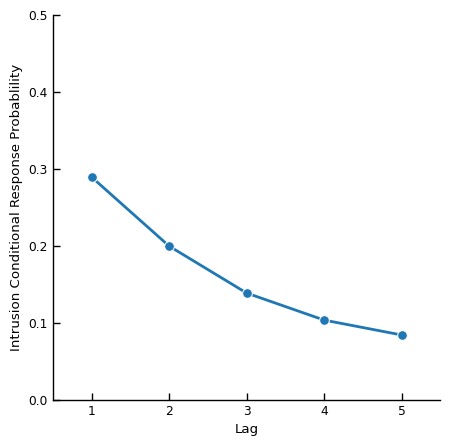

In [49]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_PLI.pdf')
plt.show()

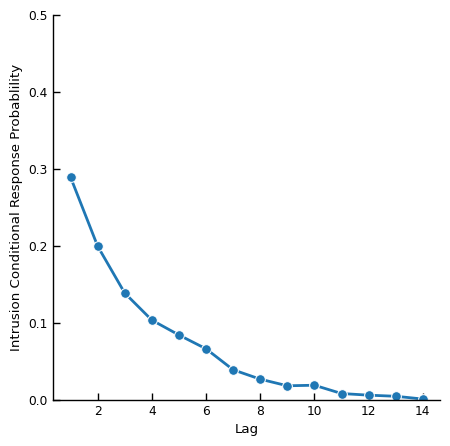

In [50]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

In [51]:
df_ILI = df_simu.loc[df_simu.intrusion_type == 'ILI']
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,1510.0,0.803293,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
12,1,0,844,999.0,3440.0,0.632181,LOOP,396,5,1,False,1.0,6.0,0.0,1.0,ILI
13,1,0,586,396.0,3370.0,0.779706,FLY,1446,4,1,False,1.0,5.0,0.0,1.0,ILI
18,2,0,1465,688.0,2820.0,0.563497,TIDE,1002,9,1,False,2.0,1.0,0.0,-8.0,ILI
20,2,0,1399,1636.0,2430.0,0.677580,SUBURB,142,3,1,False,2.0,1.0,0.0,-2.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127981,13,999,393,1085.0,2490.0,0.762419,COW,171,4,1,False,13.0,6.0,0.0,2.0,ILI
127983,13,999,1580,1285.0,4750.0,0.582861,WAITER,1338,7,1,False,13.0,0.0,0.0,-7.0,ILI
127987,14,999,1356,480.0,2430.0,0.631983,SPOOL,1637,9,0,False,14.0,0.0,0.0,-9.0,ILI
127988,14,999,1056,1015.0,4960.0,0.609180,PHYSICIAN,1572,5,1,False,14.0,1.0,0.0,-4.0,ILI


In [52]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -1.673891
2    -2.136402
3    -2.150789
4    -2.083894
5    -2.210456
6    -2.038179
7    -2.105243
8    -2.156546
9    -2.285772
10   -2.123857
11   -2.205702
12   -2.115902
13   -2.156927
14   -2.229563
15   -2.277290
Name: pos_lag, dtype: float64

In [53]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt').reset_index()
# df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
ILI_num = df_ILI.shape[0]
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / ILI_num
df_ILIgp

,pos_lag,ILI_cnt,ILI_prob
0,-11.0,912,0.022632
1,-10.0,1361,0.033774
2,-9.0,1595,0.039581
3,-8.0,1772,0.043973
4,-7.0,1940,0.048143
5,-6.0,2114,0.052460
6,-5.0,2332,0.057870
7,-4.0,2494,0.061890
8,-3.0,2920,0.072462
9,-2.0,3547,0.088021


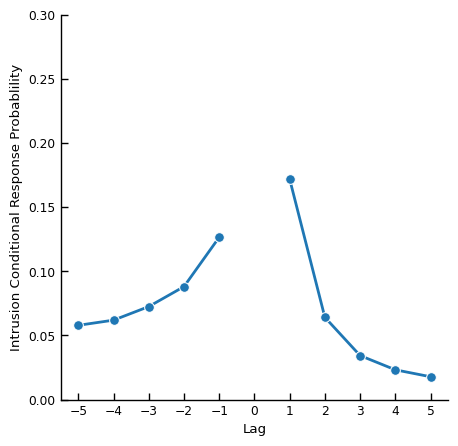

In [54]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('fig/simu7_ILI.pdf')
plt.show()